In the following sections, we will discuss general topics for deep learning.

# Linear Algebra

In [7]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

* Scalar: A scalar is a number. We will be using lower case variable like $n$ to denote scalar.
* Vector: A vector is an array of scalars. We will be using lower case variable like $x$ to denote vektor. $x_i$ denotes ith element of vektor.


* Matrix: A matrix is an 2D array of scalars. We will be using upper case variable like $X$ to denote matrix. 

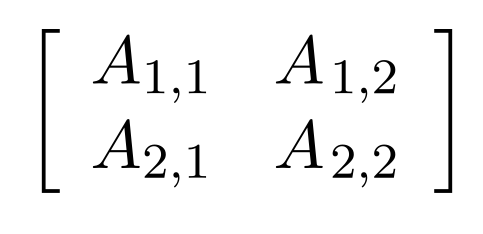

In [2]:
Image("imgs/matrix.png")

When we interested in the matrix elements from top to bottom, we name each vector a column if we examine it from left to right we name each vector a row. $X_{i,j}$ denotes an element of matrix. $i$ represents the row number and $j$ represents the column number. 

* Tensor: A tensor is an array of an array with more than two axes. We will be using upper case variable like $X$ to denote tensor.

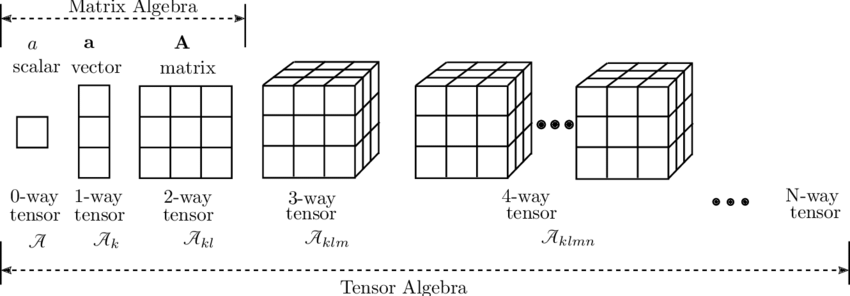

In [3]:
Image("imgs/tensor.png")

As we see above, tensor is the general name of all of scalar,vector,matrix but mostly we use "tensor" term for arrays with more than two axes. $X_{i,j,k}$ denotes some element of 3D tensor.

# Probabilty Distributions

Lets study on 3 topic:
* Parameters ($W$)
* Labels ($Y$)
* Data ($X$)

These 3 thing includes some values. When we look at the values the numbers looks random, but is that true? Or when we initiliaze paramterers of Neural Network should be the parameters choosen completely random? The short answer of these 2 questions is no. Lets dive into it.

## Uniform Distribution


Imagine that all outcomes are equally likely, in this case we get uniform distribution.

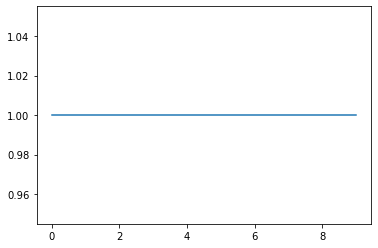

In [8]:
plt.plot(np.arange(10),np.ones(10))

The graph above is representing uniform distribution. Assume that we have a neural network that is not converged and it's mission is to predict if it is a cat or dog according image data. Model continiuesly predict as cat, then the distribution of outcome is uniform.

## Gaussian (Normal) Distribution

80% of natural data have a gaussian distribution. So what is gaussian distribution? Lets look at the shape below. 

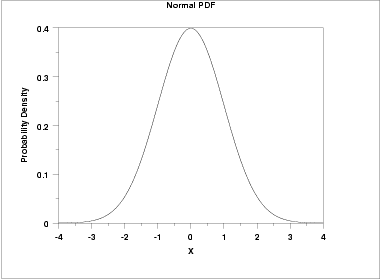

In [31]:
Image("imgs/normal_dist.gif")

$X$ is normally (gaussian) distributed with mean $\mu$ and standard deviation $\sigma$: $X \sim \mathcal{N}(\mu\sigma^{2})$. We can see a bell curve. X axis shows the outcome and Y axis tell us how likely it happens. We will be initializing the weights with gaussian distribution beacause when it converges mostly it will be gaussian distributed.

## Bernoulli Distribution

The Bernoulli Distribution is represents binary random variable. We can formulize it as $P(X) = \theta$ which $\theta \xi [0,1]$

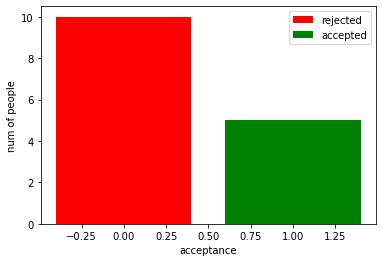

In [34]:
plt.bar(0,10,color = "red",label = "rejected")
plt.bar(1,5,color = "green",label = "accepted")
plt.xlabel("acceptance")
plt.ylabel("num of people")
plt.legend()

The result of logistic regression is distributed as bernoulli, we will discuss is later.

# Overflow and Underflow

Computers have a really big problem, they can not represent analog signals. They need to digitiliaze signals from analog to digital. What is analog signal and what is digital signal?

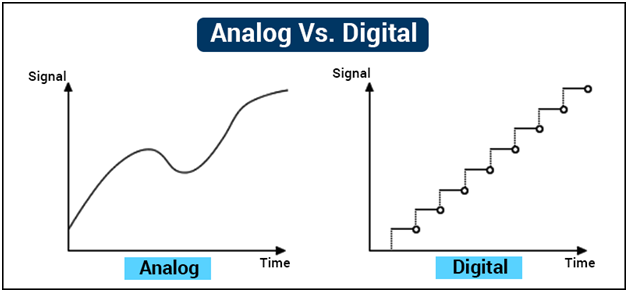

In [36]:
Image("imgs/analog_vs_digital.png")

Analog signals are continuous and digitals are not. How to represent an analog signal as digital? We take samples from analog signal and represent them as 0 and 1. The architecture of computers that based on transistors limits the representation of data. We meet this limit when it comes to handle too small or too big numbers. Lets dive into it.

In [37]:
import sys
print(sys.float_info.min)
print(sys.float_info.max)

2.2250738585072014e-308
1.7976931348623157e+308


The code cell above shows the limitation of float object. Float is the datatype that we will storage our data and weights. We will do some computation on weights and if the computation result smaller than sys.float_info.min it will be casting to zero. If bigger than sys.float_info.max it will be casting infinity. So we will end up with the errors below.

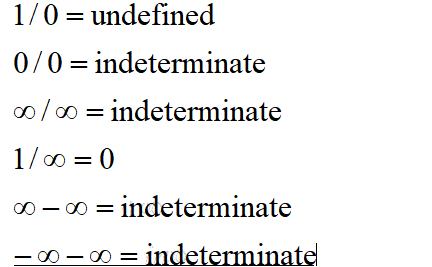

In [38]:
Image("imgs/overflow_underflow.png")

We need to avoid these problems, while we are implementing some functions we need to consider and take actions for this by using magic of math.

# Gradient Based Optimization

Imagine that we have a function $f(X;w) = X^2 + 50$

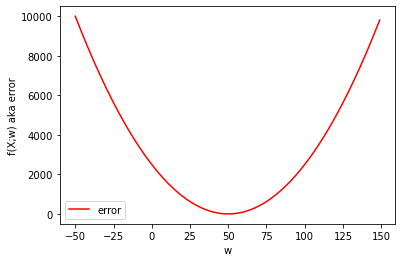

In [50]:
plt.plot(np.arange(-50,150),np.arange(-100,100)**2,label = "error",color = "red")
plt.xlabel("w")
plt.ylabel("f(X;w) aka error")
plt.legend()

Lets assume the function represents the error we make and we want to minimize it. Our initial $w$ is equal to 100. The best solution is $w = 50$. So we want to go to left. We need to decrease $w$. The solution is:
* Take the derivative of $f$ with respect to $w$
* update the $w$ according to the formula : $w:w-f'(x;w)$

The derivative of $f$ is $2x$ and our initial $w$ is equal to 100. Lets compute.

- $w: w-(2*x)$
- $100-(2*100)$
- $ w = -100$

We wanted to go to 50 but we went to left side too much. Lets study on this.

# Poor Conditioning

We wanted to change parameter $w$ to minimize the loss function. But our approch was a little problematic, the function result have changed rapidly and we went to far from the solution. We need to control the amount of change on the result of $f$. The solution for the problem we discussed is to multiply $f'(x;w)$ with learning rate.

- $w: w - f'(x;w)*lr$
- $lr (learning rate) = 0.25$
- $100 - 2*x*0.25$
- $100 - 2*100*0.25$
- $w = 50$

The learning rate is a hyperparameter. We will discuss the term of  "hyperparameter". 